In [16]:
from __future__ import annotations
import os
os.chdir('..')

from src.nanograd.value import Value
from src.nanograd.nn import MLP

In [21]:
# This is how you can create and manipulate values
# Values accept floats or ints as data and can be assigned a label
a = Value(2.0, label="a")
b = Value(4.0, label="b")
c = a * b
c.label = "c"
d = Value(3.0, label="d")
e = c + d
e.label = "e"
e

Value(data=11.0)

In [22]:
# you can take derivatives of a value w.r.t another value
e.backward()
e.grad

1.0

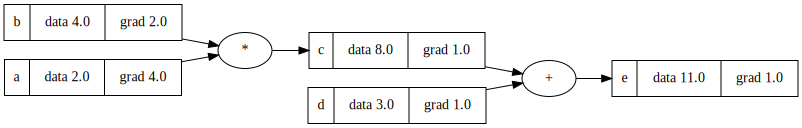

In [23]:
# Visualize the computation graph
e.visualize()

In [14]:
# Consider a more complex example
# Define inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')

# Define weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')

# Define bias of the neuron
b = Value(6.8813735870195432, label='b')

# Calculate dot product of inputs and weights vectors: x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'

# Apply activation function
o = n.tanh(); o.label = 'o'

# Perform backpropagation
o.backward()

# Visualize
o.visualize()

In [15]:
# Let's train a simple MLP

# Data
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets

# Define multi-layer perceptron with 3 inputs, 2 hidden layers with 4 neurons each, and 1 output
# layer with 1 neuron and tanh activation function
n = MLP(3, [4, 4, 1], "tanh")

In [254]:
# Train for 20 epochs with learning rate 0.1
EPOCHS = 20
alpha = 0.1
for k in range(EPOCHS):
    # generate predictions
    ypred = [n(xs[i], i) for i in range(len(xs))]
    # calculate loss as MSE
    loss = sum(((ygt - yout)**2 for ygt, yout in zip(ys, ypred)))
    print(f"Current loss: {loss.data}")
    params = n.parameters()

    # reset gradients
    for p in params:
        p.grad = 0.0
    
    # perform backpropagation
    loss.backward()

    # update parameters
    for p in params:
        p.data -= alpha * p.grad

Current loss: 0.0019874347071492412
Current loss: 0.0019747721800126407
Current loss: 0.0019622674295952424
Current loss: 0.001949917549112118
Current loss: 0.0019377197023753778
Current loss: 0.0019256711216717884
Current loss: 0.0019137691057163507
Current loss: 0.0019020110176785877
Current loss: 0.0018903942832785982
Current loss: 0.0018789163889500404
Current loss: 0.0018675748800672807
Current loss: 0.0018563673592340802
Current loss: 0.001845291484631498
Current loss: 0.0018343449684224385
Current loss: 0.0018235255752107882
Current loss: 0.0018128311205527544
Current loss: 0.0018022594695186718
Current loss: 0.0017918085353029476
Current loss: 0.0017814762778805388
Current loss: 0.0017712607027080486
